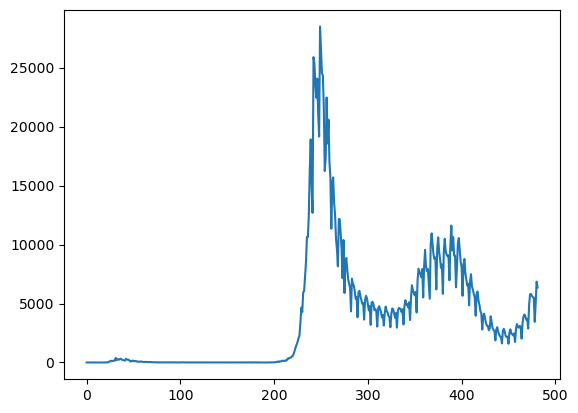

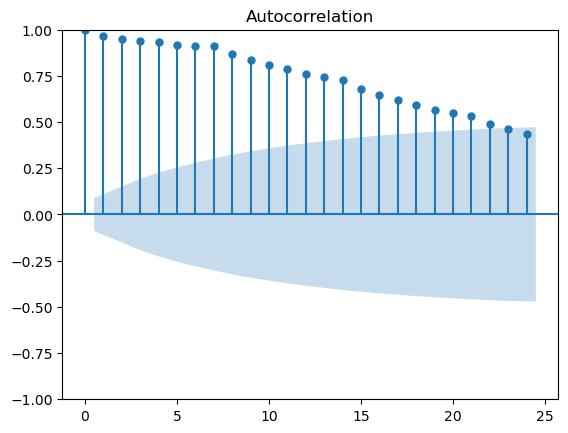

D:\88690\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


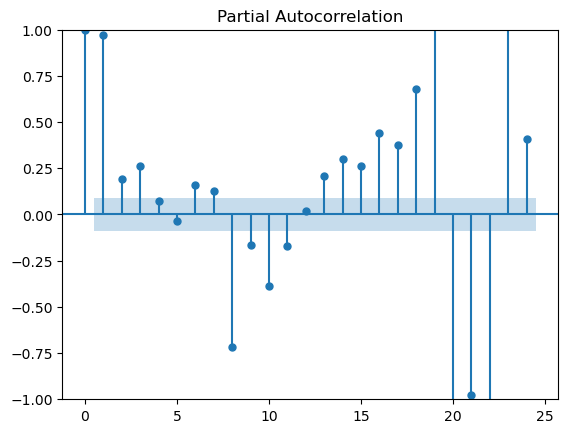

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# LSTM with regression framing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'各縣市每日確診資料\新北市每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('NewTaipei.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('NewTaipei_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('NewTaipei_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'各縣市每日確診資料\新北市每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        1
1        2
2        2
3        2
4        1
..     ...
478   3444
479   5004
480   6855
481   6365
482   5661

[483 rows x 1 columns]
483


## RNN結合LSTM架構

### Model1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
44/44 [==============================] - 4s 25ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 2/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3/1000
44/44 [==============================]

44/44 [==============================] - 0s 10ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 8.7607e-04 - val_mse: 8.7607e-04
Epoch 57/1000
44/44 [==============================] - 0s 10ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 8.5495e-04 - val_mse: 8.5495e-04
Epoch 58/1000
44/44 [==============================] - 0s 10ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 8.3274e-04 - val_mse: 8.3274e-04
Epoch 59/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 8.1902e-04 - val_mse: 8.1902e-04
Epoch 60/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 8.2430e-04 - val_mse: 8.2430e-04
Epoch 61/1000
44/44 [==============================] - 0s 9ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.9145e-04 - val_mse: 7.9145e-04
Epoch 62/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 7.9761e-04 - val_mse: 7.9761e-04
Epoch 63/1000
44/44 [==

Epoch 114/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7719e-04 - val_mse: 6.7719e-04
Epoch 115/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7448e-04 - val_mse: 6.7448e-04
Epoch 116/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7764e-04 - val_mse: 6.7764e-04
Epoch 117/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7858e-04 - val_mse: 6.7858e-04
Epoch 118/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7806e-04 - val_mse: 6.7806e-04
Epoch 119/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7959e-04 - val_mse: 6.7959e-04
Epoch 120/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 6.8119e-04 - val_mse: 6.8119e-04
Epoch 

44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3721e-04 - val_mse: 7.3721e-04
Epoch 172/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.2802e-04 - val_mse: 7.2802e-04
Epoch 173/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.2546e-04 - val_mse: 7.2546e-04
Epoch 174/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.2930e-04 - val_mse: 7.2930e-04
Epoch 175/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.2592e-04 - val_mse: 7.2592e-04
Epoch 176/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.2245e-04 - val_mse: 7.2245e-04
Epoch 177/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.2456e-04 - val_mse: 7.2456e-04
Epoch 178/1000
44/44 

Epoch 229/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4047e-04 - val_mse: 7.4047e-04
Epoch 230/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3817e-04 - val_mse: 7.3817e-04
Epoch 231/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4043e-04 - val_mse: 7.4043e-04
Epoch 232/1000
44/44 [==============================] - 0s 10ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3759e-04 - val_mse: 7.3759e-04
Epoch 233/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3932e-04 - val_mse: 7.3932e-04
Epoch 234/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3574e-04 - val_mse: 7.3574e-04
Epoch 235/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3484e-04 - val_mse: 7.3484e-04
Epoch

Epoch 287/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4429e-04 - val_mse: 7.4429e-04
Epoch 288/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4274e-04 - val_mse: 7.4274e-04
Epoch 289/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4494e-04 - val_mse: 7.4494e-04
Epoch 290/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3531e-04 - val_mse: 7.3531e-04
Epoch 291/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4261e-04 - val_mse: 7.4261e-04
Epoch 292/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4071e-04 - val_mse: 7.4071e-04
Epoch 293/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4363e-04 - val_mse: 7.4363e-04
Epoch 

44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3688e-04 - val_mse: 7.3688e-04
Epoch 345/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3853e-04 - val_mse: 7.3853e-04
Epoch 346/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4729e-04 - val_mse: 7.4729e-04
Epoch 347/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4812e-04 - val_mse: 7.4812e-04
Epoch 348/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4308e-04 - val_mse: 7.4308e-04
Epoch 349/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4294e-04 - val_mse: 7.4294e-04
Epoch 350/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4264e-04 - val_mse: 7.4264e-04
Epoch 351/1000
44/44 

Epoch 402/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3923e-04 - val_mse: 7.3923e-04
Epoch 403/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3511e-04 - val_mse: 7.3511e-04
Epoch 404/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3780e-04 - val_mse: 7.3780e-04
Epoch 405/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4866e-04 - val_mse: 7.4866e-04
Epoch 406/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4247e-04 - val_mse: 7.4247e-04
Epoch 407/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3955e-04 - val_mse: 7.3955e-04
Epoch 408/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3821e-04 - val_mse: 7.3821e-04
Epoch 

Epoch 460/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4453e-04 - val_mse: 7.4453e-04
Epoch 461/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3787e-04 - val_mse: 7.3787e-04
Epoch 462/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5387e-04 - val_mse: 7.5387e-04
Epoch 463/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3934e-04 - val_mse: 7.3934e-04
Epoch 464/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4339e-04 - val_mse: 7.4339e-04
Epoch 465/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4305e-04 - val_mse: 7.4305e-04
Epoch 466/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3981e-04 - val_mse: 7.3981e-04
Epoch 

Epoch 518/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4041e-04 - val_mse: 7.4041e-04
Epoch 519/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3809e-04 - val_mse: 7.3809e-04
Epoch 520/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4150e-04 - val_mse: 7.4150e-04
Epoch 521/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4542e-04 - val_mse: 7.4542e-04
Epoch 522/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4158e-04 - val_mse: 7.4158e-04
Epoch 523/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4502e-04 - val_mse: 7.4502e-04
Epoch 524/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3801e-04 - val_mse: 7.3801e-04
Epoch 

Epoch 576/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3863e-04 - val_mse: 7.3863e-04
Epoch 577/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3850e-04 - val_mse: 7.3850e-04
Epoch 578/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3814e-04 - val_mse: 7.3814e-04
Epoch 579/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3647e-04 - val_mse: 7.3647e-04
Epoch 580/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3655e-04 - val_mse: 7.3655e-04
Epoch 581/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3913e-04 - val_mse: 7.3913e-04
Epoch 582/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3944e-04 - val_mse: 7.3944e-04
Epoch 

44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4003e-04 - val_mse: 7.4003e-04
Epoch 634/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3771e-04 - val_mse: 7.3771e-04
Epoch 635/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3784e-04 - val_mse: 7.3784e-04
Epoch 636/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3539e-04 - val_mse: 7.3539e-04
Epoch 637/1000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3158e-04 - val_mse: 7.3158e-04
Epoch 638/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3608e-04 - val_mse: 7.3608e-04
Epoch 639/1000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3582e-04 - val_mse: 7.3582e-04
Epoch 640/1000
44/44 

Epoch 691/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3384e-04 - val_mse: 7.3384e-04
Epoch 692/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4089e-04 - val_mse: 7.4089e-04
Epoch 693/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3427e-04 - val_mse: 7.3427e-04
Epoch 694/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3612e-04 - val_mse: 7.3612e-04
Epoch 695/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3339e-04 - val_mse: 7.3339e-04
Epoch 696/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3404e-04 - val_mse: 7.3404e-04
Epoch 697/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3606e-04 - val_mse: 7.3606e-04
Epoch 

Epoch 749/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3298e-04 - val_mse: 7.3298e-04
Epoch 750/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3050e-04 - val_mse: 7.3050e-04
Epoch 751/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3285e-04 - val_mse: 7.3285e-04
Epoch 752/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3660e-04 - val_mse: 7.3660e-04
Epoch 753/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3429e-04 - val_mse: 7.3429e-04
Epoch 754/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3222e-04 - val_mse: 7.3222e-04
Epoch 755/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3694e-04 - val_mse: 7.3694e-04
Epoch 

Epoch 807/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3347e-04 - val_mse: 7.3347e-04
Epoch 808/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3768e-04 - val_mse: 7.3768e-04
Epoch 809/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3429e-04 - val_mse: 7.3429e-04
Epoch 810/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3113e-04 - val_mse: 7.3113e-04
Epoch 811/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3315e-04 - val_mse: 7.3315e-04
Epoch 812/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3507e-04 - val_mse: 7.3507e-04
Epoch 813/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3181e-04 - val_mse: 7.3181e-04
Epoch 

Epoch 865/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3482e-04 - val_mse: 7.3482e-04
Epoch 866/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3309e-04 - val_mse: 7.3309e-04
Epoch 867/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3586e-04 - val_mse: 7.3586e-04
Epoch 868/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3567e-04 - val_mse: 7.3567e-04
Epoch 869/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3397e-04 - val_mse: 7.3397e-04
Epoch 870/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3444e-04 - val_mse: 7.3444e-04
Epoch 871/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3514e-04 - val_mse: 7.3514e-04
Epoch 

Epoch 923/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3158e-04 - val_mse: 7.3158e-04
Epoch 924/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3231e-04 - val_mse: 7.3231e-04
Epoch 925/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3229e-04 - val_mse: 7.3229e-04
Epoch 926/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2668e-04 - val_mse: 7.2668e-04
Epoch 927/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3567e-04 - val_mse: 7.3567e-04
Epoch 928/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3302e-04 - val_mse: 7.3302e-04
Epoch 929/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3173e-04 - val_mse: 7.3173e-04
Epoch 

Epoch 981/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3505e-04 - val_mse: 7.3505e-04
Epoch 982/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3102e-04 - val_mse: 7.3102e-04
Epoch 983/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2880e-04 - val_mse: 7.2880e-04
Epoch 984/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3140e-04 - val_mse: 7.3140e-04
Epoch 985/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3296e-04 - val_mse: 7.3296e-04
Epoch 986/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3597e-04 - val_mse: 7.3597e-04
Epoch 987/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3439e-04 - val_mse: 7.3439e-04
Epoch 

 [7277.4697]] [[2689. 1875. 2796. 2988. 2613. 2372. 2205. 2155. 1619. 2670. 2856. 2628.
  2245. 2155. 2194. 1589. 2562. 2808. 2476. 2393. 2297. 2463. 1733. 2833.
  3259. 3000. 2946. 3098. 3043. 2022. 3337. 3905. 4072. 3919. 3614. 3657.
  2876. 4896. 5773. 5815. 5635. 5567. 5487. 3444. 5004. 6855. 6365.]]
Train Score: 1398.72 RMSE
Test Score: 769.72 RMSE


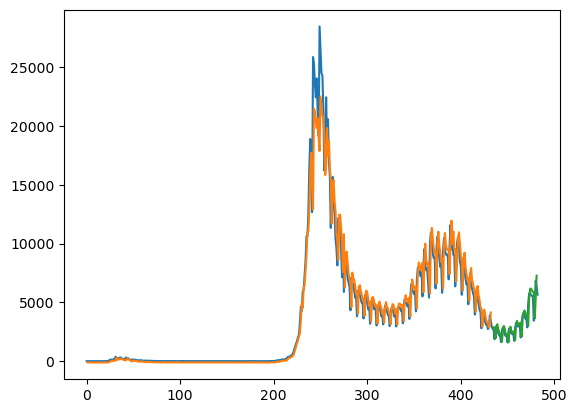

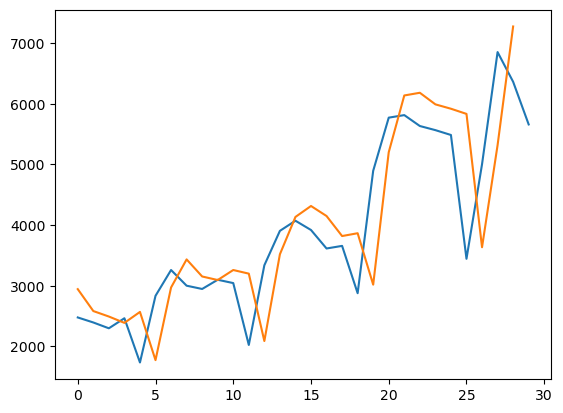

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    LSTM(64, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="newTaipei_rnn+lstm_1000_1.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('newTaipei_rnn+lstm_1000_1.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#看裡面的值是否合理、資料結構的dim
print(trainPredict,trainY)
print(testPredict,testY)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('newTaipei_rnn+lstm_1000_plot_1.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("newTaipei_rnn+lstm_1000_predict&real_1.png")
plt.show()

### Model2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1, 128)            16640     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 148,353
Trainable params: 148,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
44/44 [==============================] - 5s 27ms/step - loss: 0.0441 - mse: 0.0441 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0342 - mse: 0.0342 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3/1000
44/44 [===========================

44/44 [==============================] - 0s 11ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 8.8560e-04 - val_mse: 8.8560e-04
Epoch 57/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 8.6470e-04 - val_mse: 8.6470e-04
Epoch 58/1000
44/44 [==============================] - 0s 10ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 8.4208e-04 - val_mse: 8.4208e-04
Epoch 59/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 8.2818e-04 - val_mse: 8.2818e-04
Epoch 60/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 8.3419e-04 - val_mse: 8.3419e-04
Epoch 61/1000
44/44 [==============================] - 0s 10ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 8.0055e-04 - val_mse: 8.0055e-04
Epoch 62/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 8.0696e-04 - val_mse: 8.0696e-04
Epoch 63/1000
44/44 [=

Epoch 114/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 6.7758e-04 - val_mse: 6.7758e-04
Epoch 115/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 6.7455e-04 - val_mse: 6.7455e-04
Epoch 116/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7790e-04 - val_mse: 6.7790e-04
Epoch 117/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7877e-04 - val_mse: 6.7877e-04
Epoch 118/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7798e-04 - val_mse: 6.7798e-04
Epoch 119/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7952e-04 - val_mse: 6.7952e-04
Epoch 120/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.8110e-04 - val_mse: 6.8110e-04
Epoch 

44/44 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3874e-04 - val_mse: 7.3874e-04
Epoch 172/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.2917e-04 - val_mse: 7.2917e-04
Epoch 173/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.2644e-04 - val_mse: 7.2644e-04
Epoch 174/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3046e-04 - val_mse: 7.3046e-04
Epoch 175/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.2683e-04 - val_mse: 7.2683e-04
Epoch 176/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.2314e-04 - val_mse: 7.2314e-04
Epoch 177/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.2547e-04 - val_mse: 7.2547e-04
Epoch 178/1000
44/44 

Epoch 229/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4331e-04 - val_mse: 7.4331e-04
Epoch 230/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4074e-04 - val_mse: 7.4074e-04
Epoch 231/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4322e-04 - val_mse: 7.4322e-04
Epoch 232/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4018e-04 - val_mse: 7.4018e-04
Epoch 233/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4208e-04 - val_mse: 7.4208e-04
Epoch 234/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3820e-04 - val_mse: 7.3820e-04
Epoch 235/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3719e-04 - val_mse: 7.3719e-04
Epoch 

Epoch 287/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4820e-04 - val_mse: 7.4820e-04
Epoch 288/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4648e-04 - val_mse: 7.4648e-04
Epoch 289/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4893e-04 - val_mse: 7.4893e-04
Epoch 290/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3827e-04 - val_mse: 7.3827e-04
Epoch 291/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4644e-04 - val_mse: 7.4644e-04
Epoch 292/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4426e-04 - val_mse: 7.4426e-04
Epoch 293/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4755e-04 - val_mse: 7.4755e-04
Epoch 

44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4070e-04 - val_mse: 7.4070e-04
Epoch 345/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4250e-04 - val_mse: 7.4250e-04
Epoch 346/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5222e-04 - val_mse: 7.5222e-04
Epoch 347/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5311e-04 - val_mse: 7.5311e-04
Epoch 348/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4757e-04 - val_mse: 7.4757e-04
Epoch 349/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4748e-04 - val_mse: 7.4748e-04
Epoch 350/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4716e-04 - val_mse: 7.4716e-04
Epoch 351/1000
44/44 

Epoch 402/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4395e-04 - val_mse: 7.4395e-04
Epoch 403/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3923e-04 - val_mse: 7.3923e-04
Epoch 404/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4238e-04 - val_mse: 7.4238e-04
Epoch 405/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5452e-04 - val_mse: 7.5452e-04
Epoch 406/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4766e-04 - val_mse: 7.4766e-04
Epoch 407/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4433e-04 - val_mse: 7.4433e-04
Epoch 408/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4288e-04 - val_mse: 7.4288e-04
Epoch 

Epoch 460/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5056e-04 - val_mse: 7.5056e-04
Epoch 461/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4304e-04 - val_mse: 7.4304e-04
Epoch 462/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.6092e-04 - val_mse: 7.6092e-04
Epoch 463/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4474e-04 - val_mse: 7.4474e-04
Epoch 464/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4924e-04 - val_mse: 7.4924e-04
Epoch 465/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4886e-04 - val_mse: 7.4886e-04
Epoch 466/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4519e-04 - val_mse: 7.4519e-04
Epoch 

Epoch 518/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4655e-04 - val_mse: 7.4655e-04
Epoch 519/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4382e-04 - val_mse: 7.4382e-04
Epoch 520/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4779e-04 - val_mse: 7.4779e-04
Epoch 521/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5214e-04 - val_mse: 7.5214e-04
Epoch 522/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4784e-04 - val_mse: 7.4784e-04
Epoch 523/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5173e-04 - val_mse: 7.5173e-04
Epoch 524/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4392e-04 - val_mse: 7.4392e-04
Epoch 

Epoch 576/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4538e-04 - val_mse: 7.4538e-04
Epoch 577/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4517e-04 - val_mse: 7.4517e-04
Epoch 578/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4472e-04 - val_mse: 7.4472e-04
Epoch 579/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4278e-04 - val_mse: 7.4278e-04
Epoch 580/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4281e-04 - val_mse: 7.4281e-04
Epoch 581/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4584e-04 - val_mse: 7.4584e-04
Epoch 582/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4637e-04 - val_mse: 7.4637e-04
Epoch 

44/44 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4762e-04 - val_mse: 7.4762e-04
Epoch 634/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4507e-04 - val_mse: 7.4507e-04
Epoch 635/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4508e-04 - val_mse: 7.4508e-04
Epoch 636/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4224e-04 - val_mse: 7.4224e-04
Epoch 637/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3771e-04 - val_mse: 7.3771e-04
Epoch 638/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4305e-04 - val_mse: 7.4305e-04
Epoch 639/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4281e-04 - val_mse: 7.4281e-04
Epoch 640/1000
44/44 

Epoch 691/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4066e-04 - val_mse: 7.4066e-04
Epoch 692/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4911e-04 - val_mse: 7.4911e-04
Epoch 693/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4123e-04 - val_mse: 7.4123e-04
Epoch 694/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4346e-04 - val_mse: 7.4346e-04
Epoch 695/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4019e-04 - val_mse: 7.4019e-04
Epoch 696/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4096e-04 - val_mse: 7.4096e-04
Epoch 697/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4332e-04 - val_mse: 7.4332e-04
Epoch 

Epoch 749/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4029e-04 - val_mse: 7.4029e-04
Epoch 750/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3725e-04 - val_mse: 7.3725e-04
Epoch 751/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4009e-04 - val_mse: 7.4009e-04
Epoch 752/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4460e-04 - val_mse: 7.4460e-04
Epoch 753/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4198e-04 - val_mse: 7.4198e-04
Epoch 754/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3947e-04 - val_mse: 7.3947e-04
Epoch 755/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4515e-04 - val_mse: 7.4515e-04
Epoch 

Epoch 807/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4133e-04 - val_mse: 7.4133e-04
Epoch 808/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4657e-04 - val_mse: 7.4657e-04
Epoch 809/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4234e-04 - val_mse: 7.4234e-04
Epoch 810/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3851e-04 - val_mse: 7.3851e-04
Epoch 811/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4093e-04 - val_mse: 7.4093e-04
Epoch 812/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4324e-04 - val_mse: 7.4324e-04
Epoch 813/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3934e-04 - val_mse: 7.3934e-04
Epoch 

Epoch 865/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4384e-04 - val_mse: 7.4384e-04
Epoch 866/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4176e-04 - val_mse: 7.4176e-04
Epoch 867/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4513e-04 - val_mse: 7.4513e-04
Epoch 868/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4495e-04 - val_mse: 7.4495e-04
Epoch 869/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4288e-04 - val_mse: 7.4288e-04
Epoch 870/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4354e-04 - val_mse: 7.4354e-04
Epoch 871/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4413e-04 - val_mse: 7.4413e-04
Epoch 

Epoch 923/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4027e-04 - val_mse: 7.4027e-04
Epoch 924/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4115e-04 - val_mse: 7.4115e-04
Epoch 925/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4111e-04 - val_mse: 7.4111e-04
Epoch 926/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3395e-04 - val_mse: 7.3395e-04
Epoch 927/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4541e-04 - val_mse: 7.4541e-04
Epoch 928/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4219e-04 - val_mse: 7.4219e-04
Epoch 929/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4053e-04 - val_mse: 7.4053e-04
Epoch 

Epoch 981/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4489e-04 - val_mse: 7.4489e-04
Epoch 982/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3989e-04 - val_mse: 7.3989e-04
Epoch 983/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3706e-04 - val_mse: 7.3706e-04
Epoch 984/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4041e-04 - val_mse: 7.4041e-04
Epoch 985/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4242e-04 - val_mse: 7.4242e-04
Epoch 986/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4605e-04 - val_mse: 7.4605e-04
Epoch 987/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4430e-04 - val_mse: 7.4430e-04
Epoch 

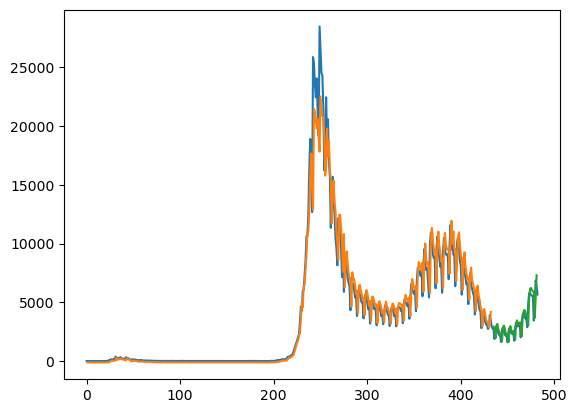

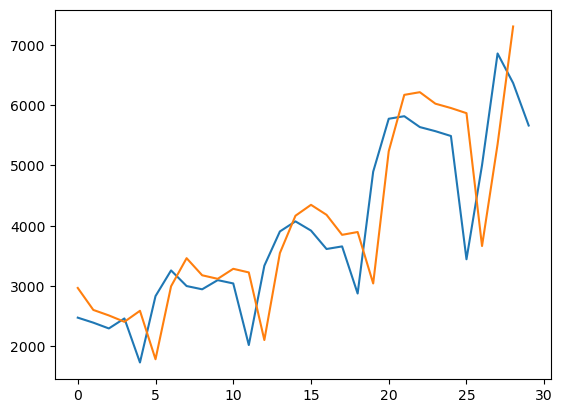

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(1, look_back)),
    LSTM(128, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="newTaipei_rnn+lstm_1000_2.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('newTaipei_rnn+lstm_1000_2.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('newTaipei_rnn+lstm_1000_plot_2.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("newTaipei_rnn+lstm_1000_predict&real_2.png")
plt.show()

### Model3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1, 64)             8256      
                                                                 
 dense_2 (Dense)             (None, 1, 64)             4160      
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 82,753
Trainable params: 82,753
Non-trai

Epoch 53/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 54/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 55/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 56/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 57/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 58/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 59/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 60/1000
44/44 [==============================] - 0s 8ms/step - 

44/44 [==============================] - 0s 9ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 9.6001e-04 - val_mse: 9.6001e-04
Epoch 114/1000
44/44 [==============================] - 0s 10ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 8.9429e-04 - val_mse: 8.9429e-04
Epoch 115/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 9.2540e-04 - val_mse: 9.2540e-04
Epoch 116/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 8.9155e-04 - val_mse: 8.9155e-04
Epoch 117/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 9.1534e-04 - val_mse: 9.1534e-04
Epoch 118/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 8.9151e-04 - val_mse: 8.9151e-04
Epoch 119/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 8.7729e-04 - val_mse: 8.7729e-04
Epoch 120/1000
44

Epoch 171/1000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2534e-04 - val_mse: 7.2534e-04
Epoch 172/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5429e-04 - val_mse: 7.5429e-04
Epoch 173/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5597e-04 - val_mse: 7.5597e-04
Epoch 174/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2701e-04 - val_mse: 7.2701e-04
Epoch 175/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5464e-04 - val_mse: 7.5464e-04
Epoch 176/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.6144e-04 - val_mse: 7.6144e-04
Epoch 177/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3799e-04 - val_mse: 7.3799e-04
Epoch

44/44 [==============================] - 0s 8ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0505e-04 - val_mse: 7.0505e-04
Epoch 229/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0642e-04 - val_mse: 7.0642e-04
Epoch 230/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0179e-04 - val_mse: 7.0179e-04
Epoch 231/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0097e-04 - val_mse: 7.0097e-04
Epoch 232/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0055e-04 - val_mse: 7.0055e-04
Epoch 233/1000
44/44 [==============================] - 0s 10ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0193e-04 - val_mse: 7.0193e-04
Epoch 234/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0271e-04 - val_mse: 7.0271e-04
Epoch 235/1000
44/44

Epoch 286/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.2047e-04 - val_mse: 7.2047e-04
Epoch 287/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.1194e-04 - val_mse: 7.1194e-04
Epoch 288/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.0754e-04 - val_mse: 7.0754e-04
Epoch 289/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.1332e-04 - val_mse: 7.1332e-04
Epoch 290/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.0594e-04 - val_mse: 7.0594e-04
Epoch 291/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.0690e-04 - val_mse: 7.0690e-04
Epoch 292/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.0936e-04 - val_mse: 7.0936e-04
Epoch 

44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.1920e-04 - val_mse: 7.1920e-04
Epoch 344/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.1741e-04 - val_mse: 7.1741e-04
Epoch 345/1000
44/44 [==============================] - 0s 9ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.4845e-04 - val_mse: 7.4845e-04
Epoch 346/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.3403e-04 - val_mse: 7.3403e-04
Epoch 347/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5758e-04 - val_mse: 7.5758e-04
Epoch 348/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.3510e-04 - val_mse: 7.3510e-04
Epoch 349/1000
44/44 [==============================] - 0s 10ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5103e-04 - val_mse: 7.5103e-04
Epoch 350/1000
44/44

Epoch 401/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.4650e-04 - val_mse: 7.4650e-04
Epoch 402/1000
44/44 [==============================] - 0s 9ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.3479e-04 - val_mse: 7.3479e-04
Epoch 403/1000
44/44 [==============================] - 0s 9ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.3670e-04 - val_mse: 7.3670e-04
Epoch 404/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5126e-04 - val_mse: 7.5126e-04
Epoch 405/1000
44/44 [==============================] - 0s 10ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7730e-04 - val_mse: 7.7730e-04
Epoch 406/1000
44/44 [==============================] - 0s 9ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.3197e-04 - val_mse: 7.3197e-04
Epoch 407/1000
44/44 [==============================] - 0s 10ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5762e-04 - val_mse: 7.5762e-04
Epoc

Epoch 459/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6386e-04 - val_mse: 7.6386e-04
Epoch 460/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5283e-04 - val_mse: 7.5283e-04
Epoch 461/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6012e-04 - val_mse: 7.6012e-04
Epoch 462/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8626e-04 - val_mse: 7.8626e-04
Epoch 463/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.4542e-04 - val_mse: 7.4542e-04
Epoch 464/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9422e-04 - val_mse: 7.9422e-04
Epoch 465/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.4610e-04 - val_mse: 7.4610e-04
Epoch 

44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7232e-04 - val_mse: 7.7232e-04
Epoch 517/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0198e-04 - val_mse: 8.0198e-04
Epoch 518/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7775e-04 - val_mse: 7.7775e-04
Epoch 519/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7010e-04 - val_mse: 7.7010e-04
Epoch 520/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9537e-04 - val_mse: 7.9537e-04
Epoch 521/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8868e-04 - val_mse: 7.8868e-04
Epoch 522/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0708e-04 - val_mse: 8.0708e-04
Epoch 523/1000
44/44 

Epoch 574/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1941e-04 - val_mse: 8.1941e-04
Epoch 575/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9973e-04 - val_mse: 7.9973e-04
Epoch 576/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6678e-04 - val_mse: 7.6678e-04
Epoch 577/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8724e-04 - val_mse: 7.8724e-04
Epoch 578/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7765e-04 - val_mse: 7.7765e-04
Epoch 579/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7673e-04 - val_mse: 7.7673e-04
Epoch 580/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8142e-04 - val_mse: 7.8142e-04
Epoch 

44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0223e-04 - val_mse: 8.0223e-04
Epoch 632/1000
44/44 [==============================] - 0s 9ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0496e-04 - val_mse: 8.0496e-04
Epoch 633/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2129e-04 - val_mse: 8.2129e-04
Epoch 634/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1015e-04 - val_mse: 8.1015e-04
Epoch 635/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1939e-04 - val_mse: 8.1939e-04
Epoch 636/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.4515e-04 - val_mse: 7.4515e-04
Epoch 637/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8209e-04 - val_mse: 7.8209e-04
Epoch 638/1000
44/44 

Epoch 689/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9342e-04 - val_mse: 7.9342e-04
Epoch 690/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3110e-04 - val_mse: 8.3110e-04
Epoch 691/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8742e-04 - val_mse: 7.8742e-04
Epoch 692/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2210e-04 - val_mse: 8.2210e-04
Epoch 693/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8490e-04 - val_mse: 7.8490e-04
Epoch 694/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7451e-04 - val_mse: 7.7451e-04
Epoch 695/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6162e-04 - val_mse: 7.6162e-04
Epoch 

Epoch 747/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1197e-04 - val_mse: 8.1197e-04
Epoch 748/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8653e-04 - val_mse: 7.8653e-04
Epoch 749/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7965e-04 - val_mse: 7.7965e-04
Epoch 750/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7379e-04 - val_mse: 7.7379e-04
Epoch 751/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2158e-04 - val_mse: 8.2158e-04
Epoch 752/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9765e-04 - val_mse: 7.9765e-04
Epoch 753/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8833e-04 - val_mse: 7.8833e-04
Epoch 

44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3645e-04 - val_mse: 8.3645e-04
Epoch 805/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0003e-04 - val_mse: 8.0003e-04
Epoch 806/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9959e-04 - val_mse: 7.9959e-04
Epoch 807/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2986e-04 - val_mse: 8.2986e-04
Epoch 808/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7285e-04 - val_mse: 7.7285e-04
Epoch 809/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1463e-04 - val_mse: 8.1463e-04
Epoch 810/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6521e-04 - val_mse: 7.6521e-04
Epoch 811/1000
44/44 

Epoch 862/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3303e-04 - val_mse: 8.3303e-04
Epoch 863/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2527e-04 - val_mse: 8.2527e-04
Epoch 864/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3660e-04 - val_mse: 8.3660e-04
Epoch 865/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3573e-04 - val_mse: 8.3573e-04
Epoch 866/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9842e-04 - val_mse: 7.9842e-04
Epoch 867/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3078e-04 - val_mse: 8.3078e-04
Epoch 868/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2103e-04 - val_mse: 8.2103e-04
Epoch 

Epoch 920/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7707e-04 - val_mse: 7.7707e-04
Epoch 921/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1056e-04 - val_mse: 8.1056e-04
Epoch 922/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3315e-04 - val_mse: 8.3315e-04
Epoch 923/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.6111e-04 - val_mse: 8.6111e-04
Epoch 924/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7058e-04 - val_mse: 7.7058e-04
Epoch 925/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8819e-04 - val_mse: 7.8819e-04
Epoch 926/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9638e-04 - val_mse: 7.9638e-04
Epoch 

44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5252e-04 - val_mse: 8.5252e-04
Epoch 978/1000
44/44 [==============================] - 0s 9ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3628e-04 - val_mse: 8.3628e-04
Epoch 979/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.6066e-04 - val_mse: 8.6066e-04
Epoch 980/1000
44/44 [==============================] - 1s 16ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9061e-04 - val_mse: 7.9061e-04
Epoch 981/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2896e-04 - val_mse: 8.2896e-04
Epoch 982/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1008e-04 - val_mse: 8.1008e-04
Epoch 983/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9527e-04 - val_mse: 7.9527e-04
Epoch 984/1000
44/4

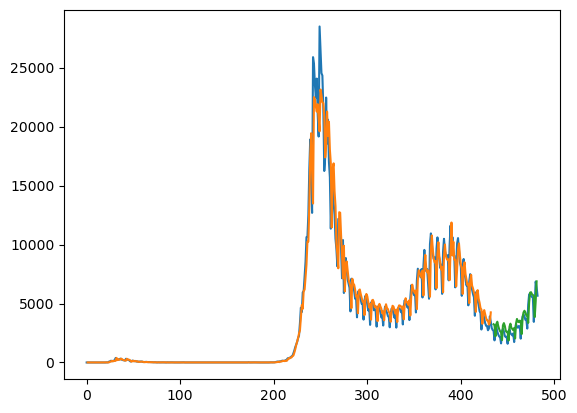

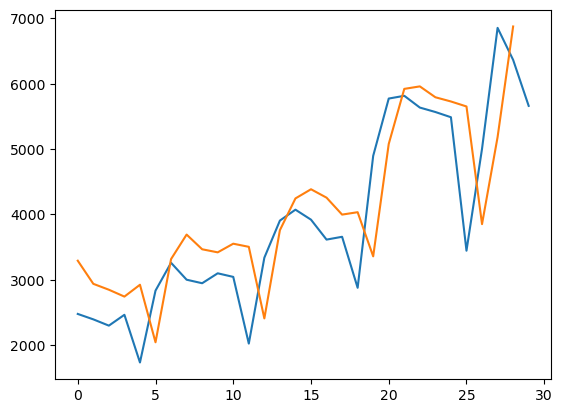

In [5]:
from tensorflow.keras.layers import Flatten,Reshape
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    SimpleRNN(64, return_sequences=True, activation='selu'),
    Dense(64, activation='selu'),
    LSTM(64, return_sequences=True, activation='selu'),
    LSTM(64, return_sequences=False, activation='selu'),
    Dense(1, activation='tanh')
])

model.output_shape
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="newTaipei_rnn+lstm_1000_3.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('newTaipei_rnn+lstm_1000_3.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('newTaipei_rnn+lstm_1000_plot_3.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("newTaipei_rnn+lstm_1000_predict&real_3.png")
plt.show()

### Model4

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 dense_4 (Dense)             (None, 1, 4)              260       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1, 64)             4416      
                                                                 
 dense_5 (Dense)             (None, 1, 1)              65        
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             16896     
                                                                 
 dense_6 (Dense)             (None, 1, 4)              260       
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)            

Epoch 51/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 52/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 53/1000
432/432 [==============================] - 3s 6ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 54/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 55/1000
432/432 [==============================] - 3s 6ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 8.8775e-04 - val_mse: 8.8775e-04
Epoch 56/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 7.1218e-04 - val_mse: 7.1218e-04
Epoch 57/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 6.9101e-04 - val_mse: 6.9101e-04
Epoch 58/1000
432/432 [========

432/432 [==============================] - 2s 5ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 8.3450e-04 - val_mse: 8.3450e-04
Epoch 109/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 9.0219e-04 - val_mse: 9.0219e-04
Epoch 110/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 7.2061e-04 - val_mse: 7.2061e-04
Epoch 111/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 112/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 7.8352e-04 - val_mse: 7.8352e-04
Epoch 113/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 114/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 6.9063e-04 - val_mse: 6.9063e-04
Epoch 115/1000
432/432 

432/432 [==============================] - 3s 7ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.6785e-04 - val_mse: 6.6785e-04
Epoch 166/1000
432/432 [==============================] - 3s 7ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 6.6190e-04 - val_mse: 6.6190e-04
Epoch 167/1000
432/432 [==============================] - 3s 7ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.0862e-04 - val_mse: 7.0862e-04
Epoch 168/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.8079e-04 - val_mse: 6.8079e-04
Epoch 169/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 9.1146e-04 - val_mse: 9.1146e-04
Epoch 170/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.6874e-04 - val_mse: 6.6874e-04
Epoch 171/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.4473e-04 - val_mse: 7.4473e-04
Epoch 1

432/432 [==============================] - 3s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 6.9978e-04 - val_mse: 6.9978e-04
Epoch 223/1000
432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 8.0131e-04 - val_mse: 8.0131e-04
Epoch 224/1000
432/432 [==============================] - 3s 6ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 7.6700e-04 - val_mse: 7.6700e-04
Epoch 225/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 7.7125e-04 - val_mse: 7.7125e-04
Epoch 226/1000
432/432 [==============================] - 3s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 227/1000
432/432 [==============================] - 3s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 228/1000
432/432 [==============================] - 3s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 8.1801e-04 - val_mse: 8.1801e-04
Epoch 229/1000
432/432 

432/432 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.4819e-04 - val_mse: 6.4819e-04
Epoch 280/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 7.4791e-04 - val_mse: 7.4791e-04
Epoch 281/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.1438e-04 - val_mse: 7.1438e-04
Epoch 282/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 6.4578e-04 - val_mse: 6.4578e-04
Epoch 283/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 7.8977e-04 - val_mse: 7.8977e-04
Epoch 284/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.7918e-04 - val_mse: 6.7918e-04
Epoch 285/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.9847e-04 - val_mse: 6.9847e-04
Epoch 2

432/432 [==============================] - 2s 5ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 337/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 8.6079e-04 - val_mse: 8.6079e-04
Epoch 338/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 7.2616e-04 - val_mse: 7.2616e-04
Epoch 339/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 6.6373e-04 - val_mse: 6.6373e-04
Epoch 340/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 341/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 8.6587e-04 - val_mse: 8.6587e-04
Epoch 342/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 343/1000
432/432 [=======

Epoch 394/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 6.6349e-04 - val_mse: 6.6349e-04
Epoch 395/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 6.7623e-04 - val_mse: 6.7623e-04
Epoch 396/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 9.7872e-04 - val_mse: 9.7872e-04
Epoch 397/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.4582e-04 - val_mse: 6.4582e-04
Epoch 398/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.8883e-04 - val_mse: 6.8883e-04
Epoch 399/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.5682e-04 - val_mse: 6.5682e-04
Epoch 400/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0014 - val_mse: 0.0014


432/432 [==============================] - 2s 5ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 6.5193e-04 - val_mse: 6.5193e-04
Epoch 452/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 453/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.4989e-04 - val_mse: 6.4989e-04
Epoch 454/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 7.1048e-04 - val_mse: 7.1048e-04
Epoch 455/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.5555e-04 - val_mse: 6.5555e-04
Epoch 456/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.6920e-04 - val_mse: 6.6920e-04
Epoch 457/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 8.9337e-04 - val_mse: 8.9337e-04
Epoch 458/1000


432/432 [==============================] - 2s 5ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 509/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 6.7937e-04 - val_mse: 6.7937e-04
Epoch 510/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 8.4380e-04 - val_mse: 8.4380e-04
Epoch 511/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 8.6972e-04 - val_mse: 8.6972e-04
Epoch 512/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 9.8976e-04 - val_mse: 9.8976e-04
Epoch 513/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.2793e-04 - val_mse: 7.2793e-04
Epoch 514/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.4544e-04 - val_mse: 6.4544e-04
Epoch 515/1000


432/432 [==============================] - 2s 5ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 8.6711e-04 - val_mse: 8.6711e-04
Epoch 566/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.7882e-04 - val_mse: 6.7882e-04
Epoch 567/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 8.5730e-04 - val_mse: 8.5730e-04
Epoch 568/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.5650e-04 - val_mse: 6.5650e-04
Epoch 569/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 8.9871e-04 - val_mse: 8.9871e-04
Epoch 570/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 6.9193e-04 - val_mse: 6.9193e-04
Epoch 571/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 6.6214e-04 - val_mse: 6.6214e-04
Epoch 5

432/432 [==============================] - 2s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 6.4622e-04 - val_mse: 6.4622e-04
Epoch 623/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 6.9318e-04 - val_mse: 6.9318e-04
Epoch 624/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 6.6233e-04 - val_mse: 6.6233e-04
Epoch 625/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 7.0856e-04 - val_mse: 7.0856e-04
Epoch 626/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 627/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.4804e-04 - val_mse: 6.4804e-04
Epoch 628/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 629/1000
432/432 

Epoch 680/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.4657e-04 - val_mse: 6.4657e-04
Epoch 681/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 682/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 7.5394e-04 - val_mse: 7.5394e-04
Epoch 683/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 6.4750e-04 - val_mse: 6.4750e-04
Epoch 684/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 6.4939e-04 - val_mse: 6.4939e-04
Epoch 685/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 9.0105e-04 - val_mse: 9.0105e-04
Epoch 686/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 6.5983e-04 - val_mse: 6.5983e-04


432/432 [==============================] - 2s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.7320e-04 - val_mse: 7.7320e-04
Epoch 738/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 7.4842e-04 - val_mse: 7.4842e-04
Epoch 739/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 6.5391e-04 - val_mse: 6.5391e-04
Epoch 740/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 7.8118e-04 - val_mse: 7.8118e-04
Epoch 741/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.0803e-04 - val_mse: 7.0803e-04
Epoch 742/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 6.5411e-04 - val_mse: 6.5411e-04
Epoch 743/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 8.1939e-04 - val_mse: 8.1939e-04
Epoch 7

Epoch 795/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 6.9038e-04 - val_mse: 6.9038e-04
Epoch 796/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.8147e-04 - val_mse: 6.8147e-04
Epoch 797/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 7.2213e-04 - val_mse: 7.2213e-04
Epoch 798/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 799/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 9.8976e-04 - val_mse: 9.8976e-04
Epoch 800/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 801/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 8.7719e-04 - val_mse: 8.7719e-04
Epoch 80

432/432 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 8.3851e-04 - val_mse: 8.3851e-04
Epoch 853/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 9.5892e-04 - val_mse: 9.5892e-04
Epoch 854/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 8.2611e-04 - val_mse: 8.2611e-04
Epoch 855/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 856/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 7.7071e-04 - val_mse: 7.7071e-04
Epoch 857/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 858/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 9.1920e-04 - val_mse: 9.1920e-04
Epoch 859/1000
432/432 

432/432 [==============================] - 2s 5ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 910/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 7.5952e-04 - val_mse: 7.5952e-04
Epoch 911/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 912/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 9.9770e-04 - val_mse: 9.9770e-04
Epoch 913/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 6.9711e-04 - val_mse: 6.9711e-04
Epoch 914/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 6.4763e-04 - val_mse: 6.4763e-04
Epoch 915/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 8.5892e-04 - val_mse: 8.5892e-04
Epoch 916/1000
432/432 

432/432 [==============================] - 2s 5ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.8809e-04 - val_mse: 6.8809e-04
Epoch 967/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 8.1986e-04 - val_mse: 8.1986e-04
Epoch 968/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.4717e-04 - val_mse: 6.4717e-04
Epoch 969/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 8.0138e-04 - val_mse: 8.0138e-04
Epoch 970/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 7.0658e-04 - val_mse: 7.0658e-04
Epoch 971/1000
432/432 [==============================] - 2s 5ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 7.8228e-04 - val_mse: 7.8228e-04
Epoch 972/1000
432/432 [==============================] - 2s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.4866e-04 - val_mse: 6.4866e-04
Epoch 9

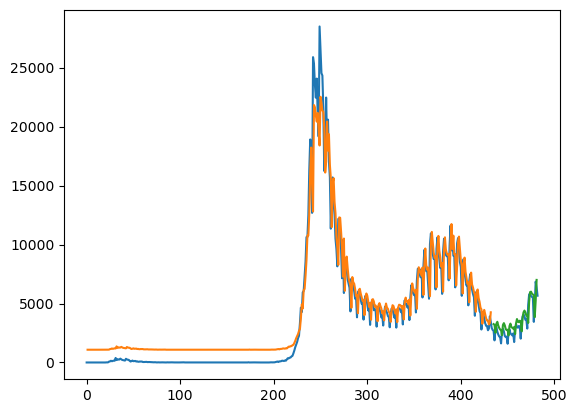

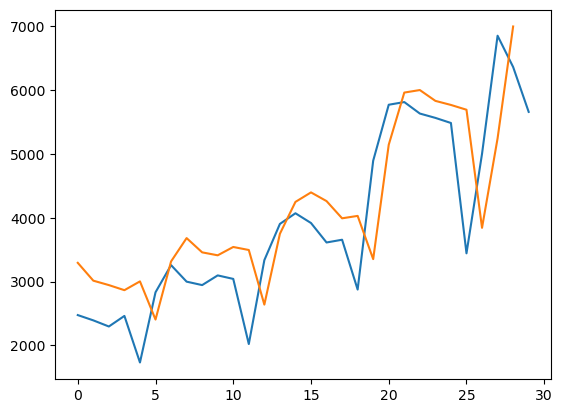

In [6]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='elu'),
    SimpleRNN(64,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='elu'),
    Dense(4, activation='elu'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="newTaipei_rnn+lstm_1000_4.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=1, verbose=1,callbacks=[model_checkpoint_callback])
model.save('newTaipei_rnn+lstm_1000_4.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('newTaipei_rnn+lstm_1000_plot_4.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("newTaipei_rnn+lstm_1000_predict&real_4.png")
plt.show()